# Import packages

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy import array, exp, log

# Sigmoid, Logistic Loss and Derivatives

In [2]:
def sigmoid(x): return 1 / (1 + exp(-x))
def logistic(y_pred, y_true):
    return -((1 - y_true) * log(1 - y_pred) + y_true * log(y_pred)).mean()

def dlda(y_pred, y_true):
    """Derivative of logistic loss with respect to sigmoid dl/dsigmoid"""
    return -((y_true - 1)/(1 - y_pred) + y_true / y_pred)

def dadz(z):
    """Derivative of sigmoid with respect to linear function dsigmoid/dz"""
    s = sigmoid(z)
    return (s * (1 - s))

# Logistic Regression class

In [3]:
class LogisticRegression:
    """Logistic Regression class
    
    Attributes
    ----------
    ndims : int
        Number of dimension for the input data
        
    w : np.ndarray
        weights
        
    b : float
        bias
    """
    def __init__(self):
        self.rg = np.random.default_rng()
        
    def __call__(self, x):
        self.z = x @ self.w + self.b
        self.a = sigmoid(self.z)
        return self.a
    
    def fit(self, x, y, epochs=1, learning_rate=0.0001):
        if not hasattr(self, 'ndims'):
            self.ndims = x.shape[1]
            self.w = self.rg.random((self.ndims, 1))
            self.b = self.rg.random((1,))
        
        losses = []
        for epoch in range(epochs):
            y_pred = self(x)
            loss = logistic(y_pred, y)
            losses.append(loss)
            dlda_ = dlda(self.a, y)
            dadz_ = dadz(self.z)
            
            dldw = (dlda_ * dadz_ * x).mean(axis=0).reshape(-1, 1)
            dldb = (dlda_ * dadz_).mean()
            
            self.w -= learning_rate * dldw
            self.b -= learning_rate * dldb
        return losses
    
    def evaluate(self, x, y):
        y_pred = np.where(self(x)>0.5, 1.0, 0.0)
        print(1 - np.abs(y - y_pred).mean())

# Test

## Create test data

In [4]:
w = array([[0.4], [-1.2]], dtype=np.float32)
b = array([0.1], dtype=np.float32)

In [5]:
rg = np.random.default_rng(300)
x = rg.random((5000, 2)) * 10 - 10
z = (x @ w + b)
y = np.where(sigmoid(z) > 0.5, 1, 0)

In [6]:
y.sum()

4232

In [7]:
x.min(), x.max()

(-9.999591981884327, -0.00021672545310735813)

## Test model

In [8]:
clf = LogisticRegression()

(array([[ 0.19109232],
        [-0.62335582]]),
 array([0.43851517]),
 0.18611341040354365)

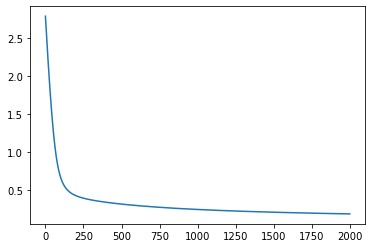

In [9]:
losses = clf.fit(x, y, epochs=2000, learning_rate=0.001)
epochs = array(range(len(losses)))
plt.plot(epochs, losses)
clf.w, clf.b, losses[-1]

In [10]:
clf.evaluate(x, y)

0.9332


In [11]:
(clf(x)>0.5).astype(float).sum()

4566.0